<a href="https://colab.research.google.com/github/Ry02024/Complex-System/blob/main/fractal/Koch_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# フラクタル（コッホ曲線）

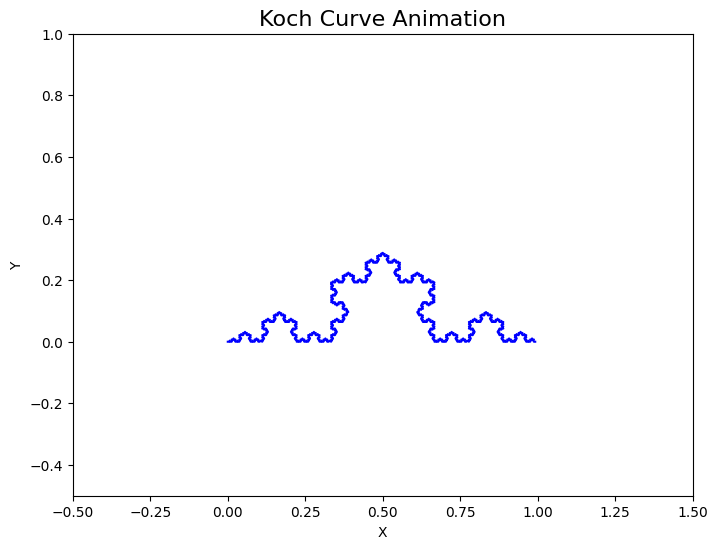

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# コッホ曲線を生成する関数
def koch_curve(start, end, depth):
    if depth == 0:
        return [start, end]

    start = np.array(start)
    end = np.array(end)

    # 3等分点を計算
    point1 = start + (end - start) / 3
    point2 = start + (end - start) * 2 / 3

    # 正三角形の頂点を計算
    angle = np.pi / 3
    point3 = point1 + np.array([
        np.cos(angle) * (point2 - point1)[0] - np.sin(angle) * (point2 - point1)[1],
        np.sin(angle) * (point2 - point1)[0] + np.cos(angle) * (point2 - point1)[1],
    ])

    # 再帰的に分割
    return (
        koch_curve(start, point1, depth - 1) +
        koch_curve(point1, point3, depth - 1) +
        koch_curve(point3, point2, depth - 1) +
        koch_curve(point2, end, depth - 1)[:-1]  # 最後の重複を削除
    )

# フラクタルの描画を準備
depths = 5  # 再帰の最大深さ
frames = []  # フレームデータを保持

for depth in range(depths + 1):
    points = koch_curve([0, 0], [1, 0], depth)
    x, y = zip(*points)
    frames.append((x, y))

# アニメーションの描画設定
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1)
ax.set_title("Koch Curve Animation", fontsize=16)
ax.set_xlabel("X")
ax.set_ylabel("Y")
line, = ax.plot([], [], color="blue")

def update(frame):
    x, y = frames[frame]
    line.set_data(x, y)
    return line,

ani = FuncAnimation(fig, update, frames=len(frames), interval=1000, blit=True)

# アニメーションを表示
from IPython.display import HTML
HTML(ani.to_jshtml())
